빅데이터 처리 기말고사 프로젝트
3-C 202044075 이휘원

축구 선수의 플레이 스탯과 연봉의 상관 관계 분석 프로젝트

In [1]:
!pip install beautifulsoup4 requests
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 32.7 MB/s eta 0:00:00


선수의 연봉 정보 크롤링 코드

In [48]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time

# Selenium WebDriver 설정
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=chrome_options)

url = "https://www.capology.com/uk/premier-league/salaries/"
driver.get(url)
time.sleep(5)

data = []
current_page = 1  # 현재 페이지 번호
max_pages = 22  # 크롤링할 최대 페이지 수

eur_to_krw = 1474  # EUR -> KRW 환율

# 환율 계산 함수
def convert_to_krw(value):
    if isinstance(value, str):  # 문자열인 경우에만 처리
        # 유로 기호와 쉼표 제거 후 float으로 변환하여 환율 적용
        return float(value.replace("€", "").replace(",", "").strip()) * eur_to_krw
    elif isinstance(value, (int, float)):  # 이미 숫자일 경우 처리
        return value * eur_to_krw
    else:
        return value

while True:
    try:
        # 페이지 소스 파싱
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        table = soup.find('table', {'class': 'table'})

        # 테이블 데이터 수집
        for row in table.find_all('tr')[1:]:  # 헤더 제외
            cells = row.find_all('td')
            if cells:
                try:
                    name = cells[0].find('a').text.strip() if cells[0].find('a') else ''
                    country = cells[0].find('img')['src'].split('/')[-1].replace('.svg', '') if cells[0].find('img') else ''
                    weekly_gross_eur = int(cells[2].text.replace("£", "").replace(",", "").strip()) if len(cells) > 2 else 0
                    annual_gross_eur = int(cells[3].text.replace("£", "").replace(",", "").strip()) if len(cells) > 3 else 0
                    position = cells[12].text.strip() if len(cells) > 12 else ''
                    age = cells[13].text.strip() if len(cells) > 13 else ''
                    club = cells[15].find('a').text.strip() if cells[15].find('a') else ''

                    data.append({
                        'Name': name,
                        'Country': country,
                        'Weekly Gross (EUR)': weekly_gross_eur,
                        'Annual Gross (EUR)': annual_gross_eur,
                        'Position': position,
                        'Age': age,
                        'Club': club
                    })
                except Exception as e:
                    print(f"데이터 수집 중 오류 발생: {e}")

        # 현재 페이지 로그 출력
        print(f"{current_page} 페이지 크롤링 완료. 현재까지 {len(data)}개의 항목 수집.")

        # 22페이지에 도달하면 종료
        if current_page >= max_pages:
            print("최대 페이지에 도달하여 크롤링을 종료합니다.")
            break

        # 다음 페이지로 이동
        next_button = WebDriverWait(driver, 15).until(
            EC.element_to_be_clickable((By.XPATH, '//a[@class="page-link" and @aria-label="next page"]'))
        )
        driver.execute_script("arguments[0].click();", next_button)
        time.sleep(5)  # 페이지 로드 대기

        current_page += 1  # 페이지 번호 증가
    except Exception as e:
        print(f"다음 페이지로 이동할 수 없음 또는 크롤링 종료: {e}")
        break

driver.quit()
df = pd.DataFrame(data)

# 유로 상태로 크롤링한 연봉을 한화 환율 적용하여 변경
df['weekly_gross_krw'] = df['Weekly Gross (EUR)'].apply(convert_to_krw)
df['annual_gross_krw'] = df['Annual Gross (EUR)'].apply(convert_to_krw)

df.to_csv('player_salaries.csv', index=False, encoding='utf-8-sig')
print(f"크롤링 완료. 총 {len(data)}개의 데이터를 수집했습니다.")

1 페이지 크롤링 완료. 현재까지 25개의 항목 수집.
2 페이지 크롤링 완료. 현재까지 50개의 항목 수집.
3 페이지 크롤링 완료. 현재까지 75개의 항목 수집.
4 페이지 크롤링 완료. 현재까지 100개의 항목 수집.
5 페이지 크롤링 완료. 현재까지 125개의 항목 수집.
6 페이지 크롤링 완료. 현재까지 150개의 항목 수집.
7 페이지 크롤링 완료. 현재까지 175개의 항목 수집.
8 페이지 크롤링 완료. 현재까지 200개의 항목 수집.
9 페이지 크롤링 완료. 현재까지 225개의 항목 수집.
10 페이지 크롤링 완료. 현재까지 250개의 항목 수집.
11 페이지 크롤링 완료. 현재까지 275개의 항목 수집.
12 페이지 크롤링 완료. 현재까지 300개의 항목 수집.
13 페이지 크롤링 완료. 현재까지 325개의 항목 수집.
14 페이지 크롤링 완료. 현재까지 350개의 항목 수집.
15 페이지 크롤링 완료. 현재까지 375개의 항목 수집.
16 페이지 크롤링 완료. 현재까지 400개의 항목 수집.
17 페이지 크롤링 완료. 현재까지 425개의 항목 수집.
18 페이지 크롤링 완료. 현재까지 450개의 항목 수집.
19 페이지 크롤링 완료. 현재까지 475개의 항목 수집.
20 페이지 크롤링 완료. 현재까지 500개의 항목 수집.
21 페이지 크롤링 완료. 현재까지 525개의 항목 수집.
데이터 수집 중 오류 발생: invalid literal for int() with base 10: ''
데이터 수집 중 오류 발생: invalid literal for int() with base 10: ''
데이터 수집 중 오류 발생: invalid literal for int() with base 10: ''
데이터 수집 중 오류 발생: invalid literal for int() with base 10: ''
데이터 수집 중 오류 발생: invalid literal for int() with base 10: ''
데이터 수집 중 오류 발생: invalid 

In [29]:
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                530 non-null    object
 1   Country             530 non-null    object
 2   Weekly Gross (EUR)  530 non-null    int64 
 3   Annual Gross (EUR)  530 non-null    int64 
 4   Position            530 non-null    object
 5   Age                 530 non-null    object
 6   Club                530 non-null    object
 7   weekly_gross_krw    530 non-null    int64 
 8   annual_gross_krw    530 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 37.4+ KB
                Name  Country  Weekly Gross (EUR)  Annual Gross (EUR)  \
0    Kevin De Bruyne  belgium              400000            20800000   
1     Erling Haaland   norway              375000            19500000   
2           Casemiro   brazil              350000            18200000   
3      Mohamed Salah    e

선수의 스탯 정보 크롤링 코드

In [30]:
# 크롬 개발자 도구로 확인한 결과. 'understat.com' 페이지는 동적 페이지 구성으로
# 'capolgy.com'페이지와 같이 html 크롤링은 불가했고, 그에 따라 js request를 따라 가는 방식으로
# 크롤링을 진행했습니다.
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=chrome_options)

try:
    driver.get('https://understat.com/js/jTable.js?v=2.6')
    print(driver.page_source)
finally:
    driver.quit()


<html><head><meta name="color-scheme" content="light dark"></head><body><pre style="word-wrap: break-word; white-space: pre-wrap;">"use strict";

(function ($) {
	var defaults = {
		columns				: [],
		data				: [],
		pagination			: false,
		countinpage			: false,
		options				: true
	};
	var methods = {
		setOption: function (option, value) {
            var $this 	= $(this),
                data 	= $this.data('table'),
				page 	= 1;
			if (!data) {
				return false;
			}
			data.options[option] = value;
			if (option === 'data') {
				data.options._data = data.options.data;
				if (data.options.options === true) {
					$this.table("optionsUpdate");
				}
				$this.table("filters");
			}
            return true;     
        },
		getOptions: function() {
            return $(this).data('table').options;
        },
		_parseTypes: function(options) {
            $.each(options, function(option, value){
                switch (option) {
					case 'columns':
					case 'data':
            

In [31]:
# 위의 결과 js 코드를 분석한 결과 data.$tbody 파트에서 제가 구하려는 데이터의 호출이 이루어지는 것을 파악한 후,
# 해당 데이터가 출력된 div id인 'league-players'와 "table"로 이루어진 데이터를 호출하였고, 이를 크롤링 하는데 성공하였습니다.
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(options=chrome_options)

driver.get("https://understat.com/league/EPL")
# 데이터 추출
script = """
    return $("#league-players").data("table").options.data;
"""
data = driver.execute_script(script)
print(data)
driver.quit()
df = pd.DataFrame(data)
df.to_csv('player_stats.csv', index=False)


[{'NPG': 11, 'NPxG': 12.525751769542694, 'NPxG90': 1.0438126474618912, 'NPxG90xA90': 1.1158333135147889, 'a': 0, 'apps': 12, 'goals': 12, 'id': '8260', 'min': 1080, 'number': 1, 'player': 'Erling Haaland', 'team': 'Manchester City', 'xA': 0.8642479926347733, 'xA90': 0.07202066605289777, 'xG': 13.286920607089996, 'xG90': 1.1072433839241664, 'xG90xA90': 1.1792640499770641, 'xGBuildup': 1.3429269380867481, 'xGBuildup90': 0.11191057817389567, 'xGChain': 10.887216567993164, 'xGChain90': 0.9072680473327637}, {'NPG': 7, 'NPxG': 6.204321552067995, 'NPxG90': 0.526782018571811, 'NPxG90xA90': 0.8801276375240875, 'a': 6, 'apps': 12, 'goals': 10, 'id': '1250', 'min': 1060, 'number': 2, 'player': 'Mohamed Salah', 'team': 'Liverpool', 'xA': 4.161626178771257, 'xA90': 0.35334561895227656, 'xG': 8.48782804608345, 'xG90': 0.7206646454221798, 'xG90xA90': 1.0740102643744562, 'xGBuildup': 4.854185294359922, 'xGBuildup90': 0.41214780801169154, 'xGChain': 14.508489519357681, 'xGChain90': 1.2318528837190483},

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NPG          463 non-null    int64  
 1   NPxG         463 non-null    float64
 2   NPxG90       463 non-null    float64
 3   NPxG90xA90   463 non-null    float64
 4   a            463 non-null    int64  
 5   apps         463 non-null    int64  
 6   goals        463 non-null    int64  
 7   id           463 non-null    object 
 8   min          463 non-null    int64  
 9   number       463 non-null    int64  
 10  player       463 non-null    object 
 11  team         463 non-null    object 
 12  xA           463 non-null    float64
 13  xA90         463 non-null    float64
 14  xG           463 non-null    float64
 15  xG90         463 non-null    float64
 16  xG90xA90     463 non-null    float64
 17  xGBuildup    463 non-null    float64
 18  xGBuildup90  463 non-null    float64
 19  xGChain 

위의 info()결과를 보게 되면, 선수의 기초 정보와 프로그래밍 상 부여한 고유 번호를 제외하곤 모두 선수의 경기 스탯에 대한 내용입니다.
<br>
문제는 구단에서 급여를 제공하여 급여 정보는 있지만, 임대, 부상, 실력등의 문제로 1군 경기에는 한번도 출전하지 못하여 스탯이 없는 선수들이 존재해 선수의 수의 차이 문제가 있습니다.

해당 문제는 현재는 넘어가고, 선수별 스탯과 연봉 정보를 Radar Chart를 통해 시각화 하였습니다.

                  Name   Country  Weekly Gross (EUR)  Annual Gross (EUR)  \
0      Kevin De Bruyne   belgium              400000            20800000   
1       Erling Haaland    norway              375000            19500000   
2             Casemiro    brazil              350000            18200000   
3        Mohamed Salah     egypt              350000            18200000   
4      Marcus Rashford   england              300000            15600000   
..                 ...       ...                 ...                 ...   
384      Tyler Dibling   england                5000              260000   
385       Toby Collyer   england                5000              260000   
386  Samuel Amo-Ameyaw   england                5000              260000   
387        Andy Irving  scotland                5000              260000   
388       Ryan Trevitt   england                2500              130000   

    Position  Age               Club  weekly_gross_krw  annual_gross_krw  NPG  \
0     

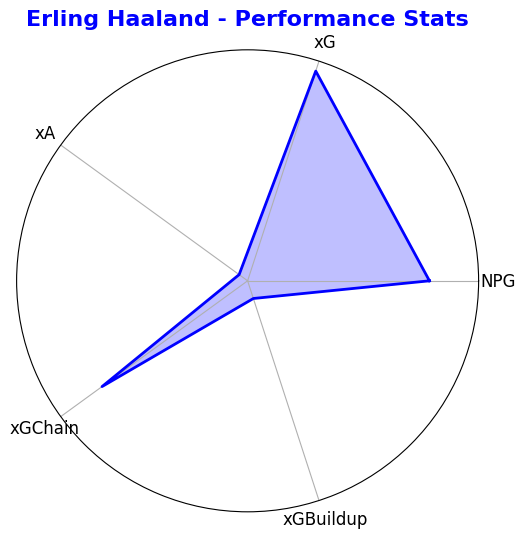

In [41]:
# 필요한 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 읽어오기
salary_data = pd.read_csv('/content/player_salaries.csv')  # 급여 정보 CSV 파일 경로
stat_data = pd.read_csv('/content/player_stats.csv')  # 스탯 정보 CSV 파일 경로

# Radar Chart (스탯 시각화)
def plot_radar_chart(player_data):
    # 스탯에 포함할 열 지정
    stats_columns = ['NPG', 'xG', 'xA', 'xGChain', 'xGBuildup']  # 빈 문자열 제거
    stats = player_data[stats_columns].values.flatten()  # 1차원 배열로 변환
    stats_labels = stats_columns

    # Radar Chart 세팅
    num_vars = len(stats)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    stats = np.concatenate((stats, [stats[0]]))  # 시작점으로 돌아가기 위해 추가
    angles += angles[:1]

    # Plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, stats, color='blue', alpha=0.25)
    ax.plot(angles, stats, color='blue', linewidth=2)

    # 라벨 및 레이아웃 설정
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(stats_labels, color='black', fontsize=12)
    ax.set_title(f"{player_data['Name']} - Performance Stats", size=16, color='blue', weight='bold')
    plt.show()

# 데이터 병합 (Name과 player 컬럼이 서로 다르므로, left_on과 right_on을 각각 지정)
merged_data = pd.merge(salary_data, stat_data, left_on='Name', right_on='player', how='inner')
print(merged_data)

# 선수 이름을 입력받고 공백 제거 후 대소문자 무시
player_name = input("Enter player name: ").strip().title()  # 앞뒤 공백 제거하고 첫 글자 대문자

# 데이터프레임에서 선수 이름을 비교할 때도 공백 제거 및 대소문자 차이 무시
merged_data['Name'] = merged_data['Name'].str.strip().str.title()  # 이름의 앞뒤 공백 제거하고, 첫 글자 대문자 처리

# 선수 데이터 필터링
player_stats = merged_data[merged_data['Name'] == player_name]

# 해당 선수의 스탯 차트 출력
if not player_stats.empty:
    plot_radar_chart(player_stats.iloc[0])  # 첫 번째 행만 사용하여 차트 출력
else:
    print(f"Player {player_name} not found in the data.")


뛰어나게 학습된 모델을 얻기 위해서는 많은 데이터 샘플을 넣어야 하지만,
<br>
다양한 리그를 합치게 될 경우, 리그당 UEFA 배점과 국가별 FIFA 점수, 국제 대회에서의 성적 등 고려해야 할 부분이 너무나 많아져
<BR>
'만약 EPL에서 연봉은 N원 받을려면 스탯을 N개 생산을 해야하는가?'
<BR>
'만약 EPL에서 스탯을 N개 생산할 경우 받을 수 있는 연봉은 어느정도인가?'
<BR>
해당 질문들에 대해서 답할 수 있는 상태로 진행하기로 결정하였습니다.

In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# merged_data에 이미 합쳐진 데이터가 들어있다고 가정
# 1. 선수의 스탯을 입력받고 예상 연봉을 예측하는 모델 학습
X = merged_data[['xG', 'xA', 'NPxG', 'xG90', 'xA90', 'goals']]  # 스탯
y = merged_data['annual_gross_krw']  # 연봉 (원화)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화 (스케일링)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 2. 선수의 연봉을 입력받고 예상 스탯을 예측하는 모델 학습
# 연봉을 예측하는 모델
model_reverse = LinearRegression()

# 연봉을 입력받고 스탯을 예측하는 모델 학습 (연봉은 'annual_gross_krw'로 설정)
X_reverse = merged_data[['annual_gross_krw']]  # 연봉을 입력값으로
y_reverse = merged_data[['xG', 'xA', 'NPxG', 'xG90', 'xA90', 'goals']]  # 각 스탯을 예측

# 모델 학습
model_reverse.fit(X_reverse, y_reverse)

# 사용자가 입력한 연봉에 대해 스탯 예측
def predict_stats_from_salary(salary_krw):
    salary_input = np.array([salary_krw]).reshape(-1, 1)
    predicted_stats = model_reverse.predict(salary_input)
    return predicted_stats[0]  # 예측된 스탯 반환

# 사용자가 입력한 스탯을 바탕으로 연봉 예측
def predict_salary_from_stats(stats):
    stats_values = np.array([[stats['xG'], stats['xA'], stats['NPxG'], stats['xG90'], stats['xA90'], stats['goals']]])
    stats_values_scaled = scaler.transform(stats_values)  # 입력값 스케일링
    predicted_salary = model.predict(stats_values_scaled)
    return predicted_salary[0]

# 사용자가 연봉을 입력했을 때, 연봉에 맞는 스탯을 예측하는 부분
salary_input = float(input("Enter the salary in KRW: "))
predicted_stats = predict_stats_from_salary(salary_input)

# 사용자가 스탯을 입력했을 때, 해당 스탯에 맞는 연봉을 예측하는 부분
player_stats = {
    'xG': float(input("Enter xG: ")),
    'xA': float(input("Enter xA: ")),
    'NPxG': float(input("Enter NPxG: ")),
    'xG90': float(input("Enter xG90: ")),
    'xA90': float(input("Enter xA90: ")),
    'goals': float(input("Enter goals: "))
}

predicted_salary = predict_salary_from_stats(player_stats)

# 결과 출력
print(f"입력된 연봉을 바탕으로 한 스탯 예측 - {predicted_stats}")
print(f"입력된 스탯을 바탕으로 한 연봉 예측 - {predicted_salary}")


Mean Squared Error (MSE): 3.381186421616047e+19
Enter the salary in KRW: 99999999999


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Enter xG: 1.3
Enter xA: 1.3
Enter NPxG: 1.3
Enter xG90: 1.3
Enter xA90: 1.3
Enter goals: 9
입력된 연봉을 바탕으로 한 스탯 예측 - [8.95483181 6.12489587 7.95383994 1.14756587 0.52590634 7.60764326]
입력된 스탯을 바탕으로 한 연봉 예측 - 792787985.2832403


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


모델이 정상적이지 않아서 MSE의 값이 높게 나오게 되고,
<br>
이는 데이터 학습과 예측 결과 도출에 큰 영향을 미치고 있습니다.